In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import yfinance as yf
from datetime import datetime, timedelta


In [85]:
stock_list = ["AAPL" , "GOOG" , "MSFT" , "AMZN"]

end = datetime.now()
start = datetime(end.year - 10 ,end.month , end.day )

df = yf.download(stock_list , start , end , group_by="ticker")
df

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\3916246041.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_list , start , end , group_by="ticker")
[*********************100%***********************]  4 of 4 completed


Ticker            AMZN                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2016-01-08   30.983000   31.207001   30.299999   30.352501  110258000   
2016-01-11   30.624001   30.992500   29.928499   30.886999   97832000   
2016-01-12   31.262501   31.299500   30.612000   30.894501   94482000   
2016-01-13   31.044001   31.044001   28.958000   29.090500  153104000   
2016-01-14   29.012501   30.112499   28.493999   29.650000  144760000   
...                ...         ...         ...         ...        ...   
2025-12-31  232.910004  232.990005  230.119995  230.820007   24383700   
2026-01-02  231.339996  235.460007  224.699997  226.500000   51456200   
2026-01-05  228.839996  234.000000  227.179993  233.059998   49733300   
2026-01-06  232.100006  243.179993  232.070007  240.929993   53764700   
2026-01-07  239.610001  245.289993  239.520004  241.559998   42180200   

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-01-08   45.855727   46.652533   45.663095   45.820705  48754000   
2016-01-11   45.978315   46.276023   45.058924   45.794437  36943800   
2016-01-12   46.197205   46.494913   45.584281   46.214718  36095500   
2016-01-13   47.107841   47.344256   44.918815   45.216522  66883600   
2016-01-14   45.531753   46.775118   45.155240   46.503681  52381900   
...                ...         ...         ...         ...       ...   
2025-12-31  487.839996  488.140015  483.299988  483.619995  15601600   
2026-01-02  484.390015  484.660004  470.160004  472.940002  25571600   
2026-01-05  474.059998  476.070007  469.500000  472.850006  25250300   
2026-01-06  473.799988  478.739990  469.750000  478.510010  23037700   
2026-01-07  479.760010  489.700012  477.950012  483.470001  25547100   

Ticker            AAPL                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2016-01-08   22.219970   22.346232   21.816380   21.861473  283192000   
2016-01-11   22.314665   22.334956   21.947149   22.215458  198957600   
2016-01-12   22.670906   22.702471   22.285352   22.537878  196616800   
2016-01-13   22.619048   22.815206   21.938132   21.958424  249758400   
2016-01-14   22.086938   22.655121   21.586397   22.438669  252680400   
...                ...         ...         ...         ...        ...   
2025-12-31  273.059998  273.679993  271.750000  271.859985   27293600   
2026-01-02  272.260010  277.839996  269.000000  271.010010   37838100   
2026-01-05  270.640015  271.510010  266.140015  267.260010   45647200   
2026-01-06  267.000000  267.549988  262.119995  262.359985   52352100   
2026-01-07  263.200012  263.679993  259.809998  260.329987   48262000   

Ticker            GOOG                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2016-01-08   36.300236   36.388575   35.384607   35.457558  49018000  
2016-01-11   35.563772   35.675184   34.915133   35.534985  41812000  
2016-01-12   35.815374   36.166243   35.598847   36.033241  40490000  
2016-01-13   36.270464   36.463516   34.670465   34.767239  50034000  
2016-01-14   35.006444   35.827534   34.198505   35.469967  44516000  
...                ...         ...         ...         ...       ...  
2025-12-31  313.369995  315.390015  312.200012  313.799988  10821500  
2026-01-02  317.589996  322.914001  310.649994  315.320007  22043700  
2026-01-05  317.695007  319.250000  315.248993  317.320007  19934000  
2026-01-06  317.309998  321.559998  312.339996  314.549988  18989900  
2026-01-07  314.570007

In [86]:
df.columns.names = ["ticker" , "stock info"]

df = df.stack(level=0).rename_axis([ "date","ticker"]).reset_index()

compony_name = {
    "AAPL":"AAPL",
    "GOOG":"GOOG",
    "MSFT":"MSFT",
    "AMZN":"AMZN"
    

}

df["compony_name"] = df["ticker"].map(compony_name)

df

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\2655375049.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level=0).rename_axis([ "date","ticker"]).reset_index()


stock info,date,ticker,Open,High,Low,Close,Volume,compony_name
0,2016-01-08,AAPL,22.219970,22.346232,21.816380,21.861473,283192000,AAPL
1,2016-01-08,AMZN,30.983000,31.207001,30.299999,30.352501,110258000,AMZN
2,2016-01-08,GOOG,36.300236,36.388575,35.384607,35.457558,49018000,GOOG
3,2016-01-08,MSFT,45.855727,46.652533,45.663095,45.820705,48754000,MSFT
4,2016-01-11,AAPL,22.314665,22.334956,21.947149,22.215458,198957600,AAPL
...,...,...,...,...,...,...,...,...
10051,2026-01-06,MSFT,473.799988,478.739990,469.750000,478.510010,23037700,MSFT
10052,2026-01-07,AAPL,263.200012,263.679993,259.809998,260.329987,48262000,AAPL
10053,2026-01-07,AMZN,239.610001,245.289993,239.520004,241.559998,42180200,AMZN
10054,2026-01-07,GOOG,314.570007,326.464996,314.500000,322.429993,24655800,GOOG


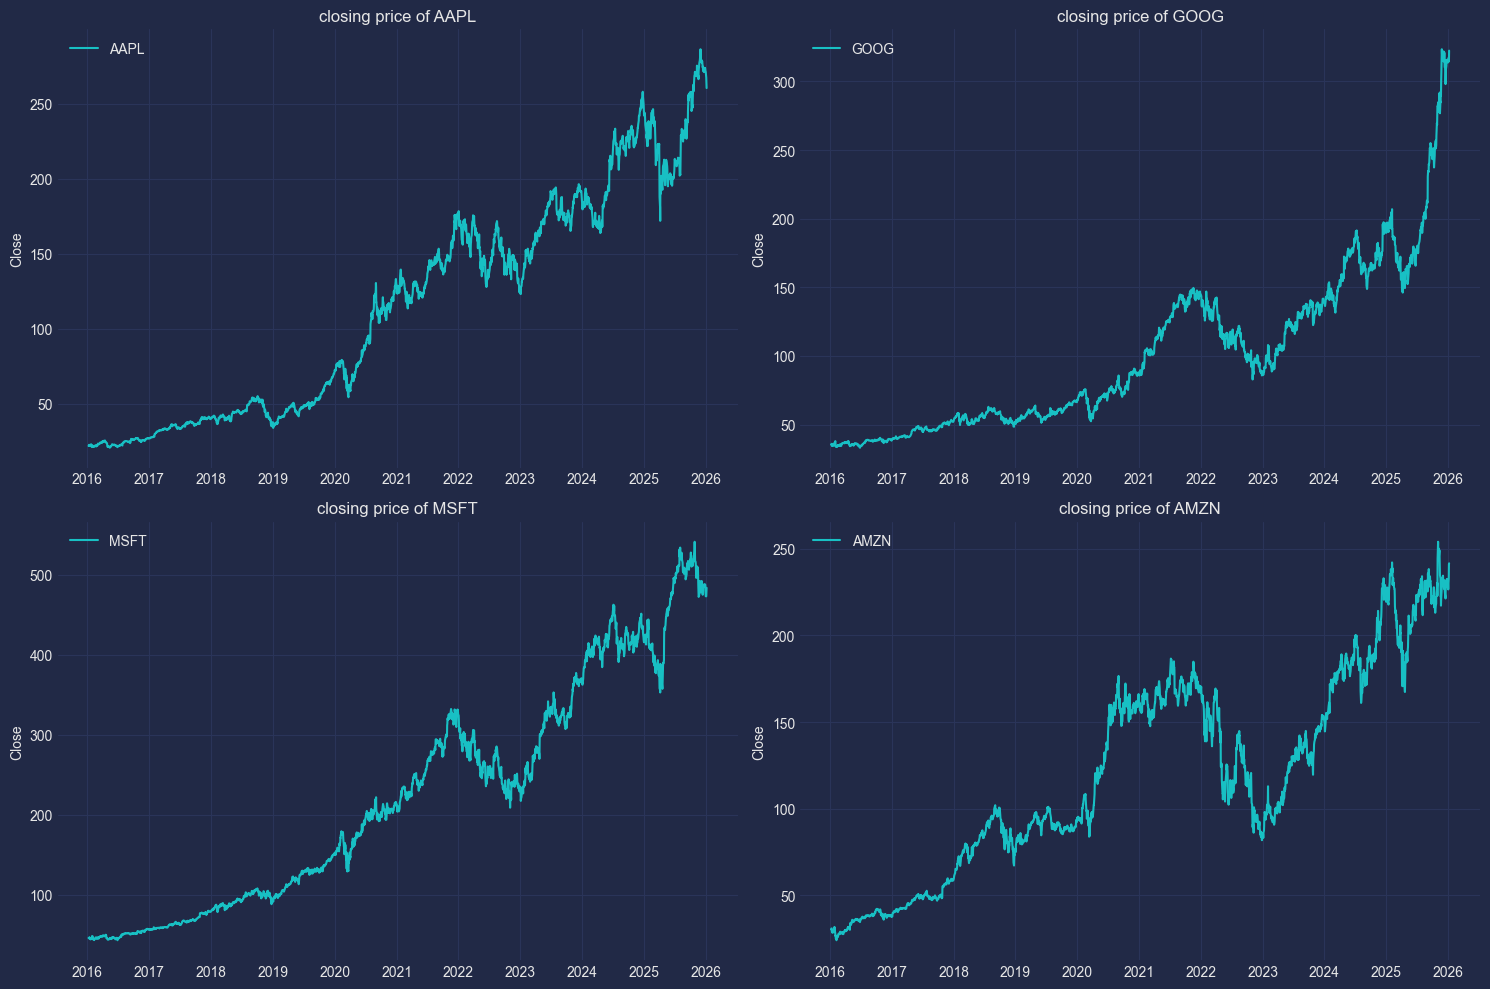

In [87]:
plt.figure(figsize=(15 , 10))
plt.subplots_adjust(top=0.95 , bottom=0.05)

for i , ticker in enumerate(stock_list , 1):
    plt.subplot(2 , 2 , i)
    data = df[df["ticker"]== ticker]
    plt.plot(data["date"] , data["Close"] , label=ticker)
    plt.ylabel("Close")
    plt.title(f"closing price of {ticker}")
    plt.legend()

plt.tight_layout()
plt.show()


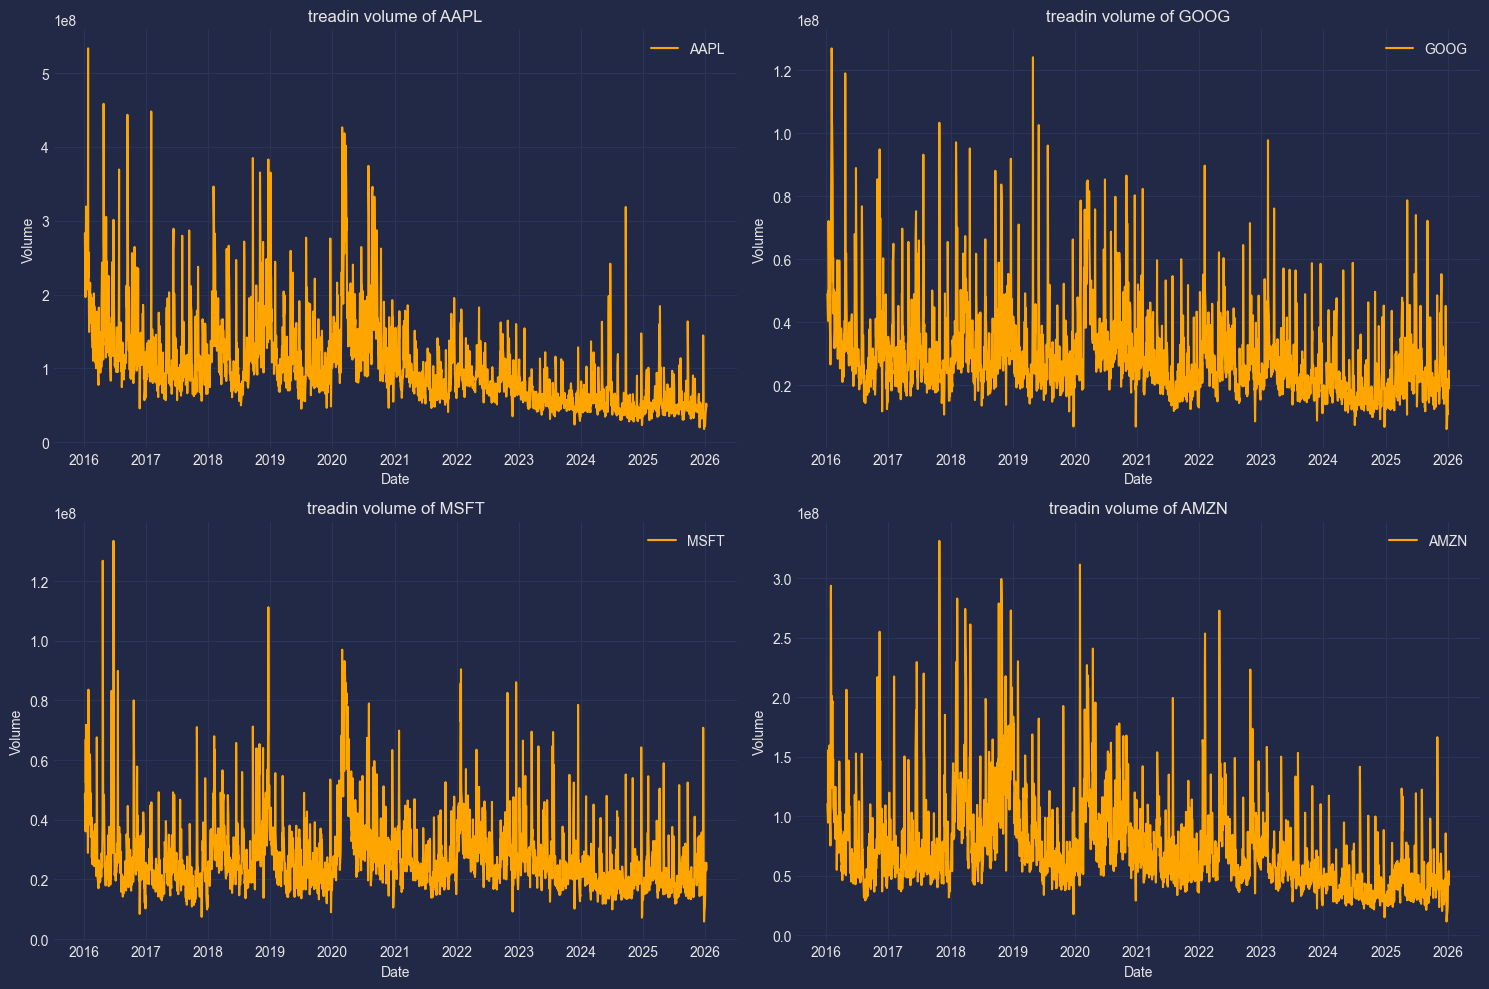

In [88]:
plt.figure(figsize=(15 , 10))
plt.subplots_adjust(top=0.95 , bottom=0.05)

for i , ticker in enumerate(stock_list , 1):
    plt.subplot(2 , 2 , i)
    data = df[df["ticker"] == ticker]
    plt.plot(data["date"] , data["Volume"] , label=ticker , color = "orange" )
    plt.title(f"treadin volume of {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()

plt.tight_layout()
plt.show()


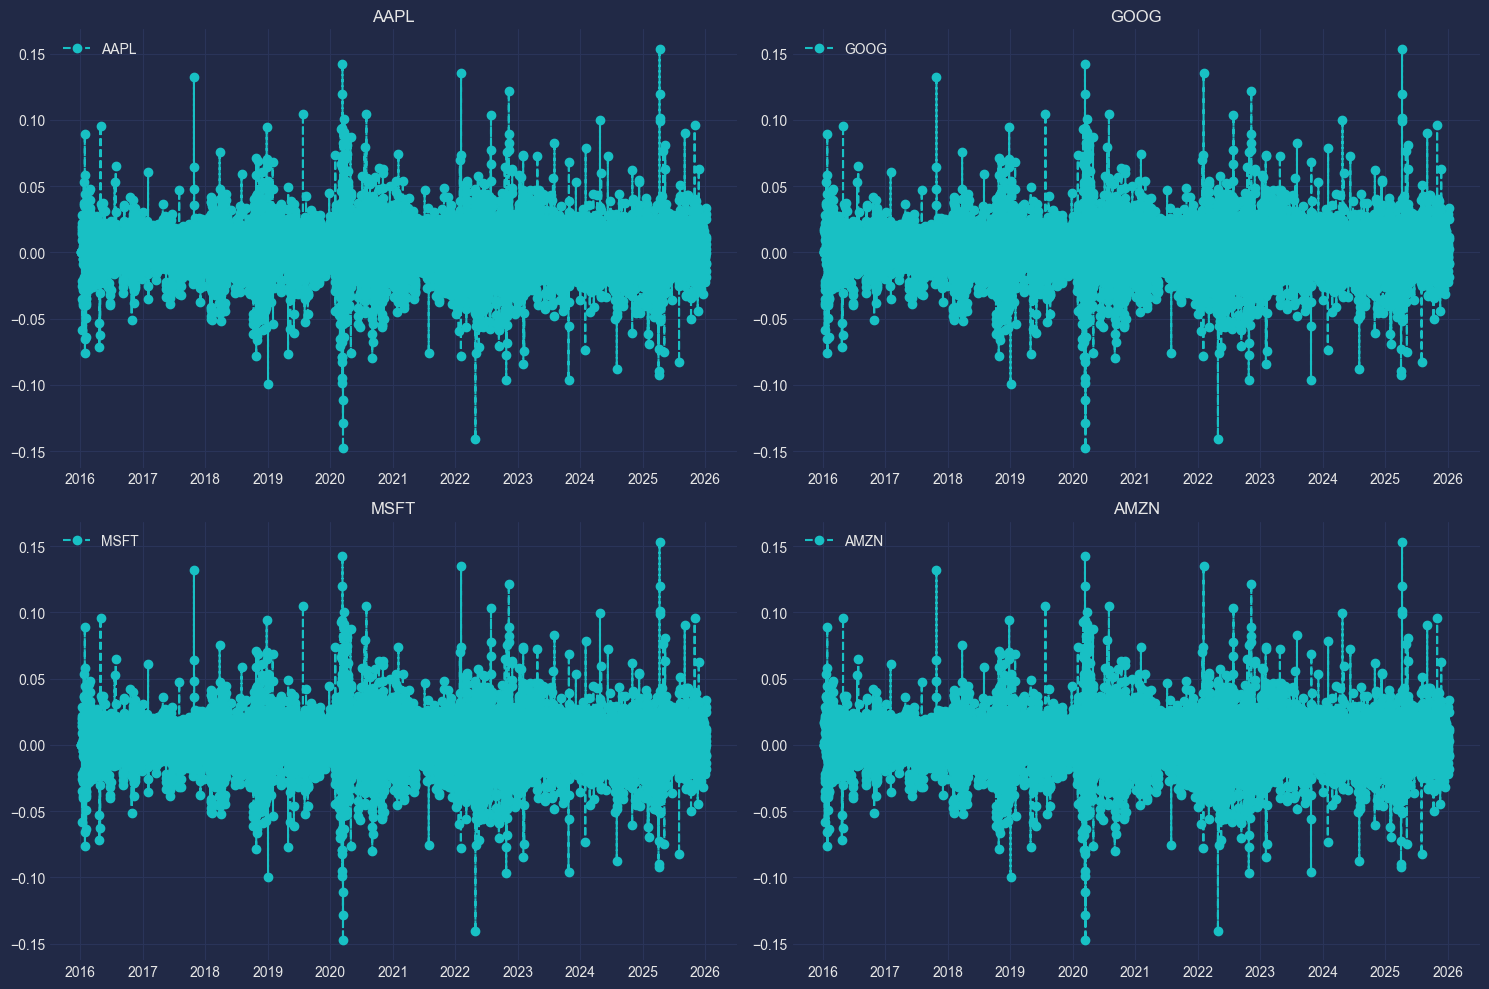

In [89]:
df["daily_return"] = df.groupby("ticker")["Close"].pct_change().fillna(0)


fig , axes = plt.subplots(nrows= 2 , ncols= 2 , figsize = (15 , 10))

for i , ticker in zip(axes.flatten() , stock_list):
    data = df[df["ticker"] == ticker]
    i.plot(df["date"] , df["daily_return"] , linestyle = "--" , marker = "o" , label = ticker)
    i.set_title(ticker)
    i.legend()

plt.tight_layout()
plt.show()





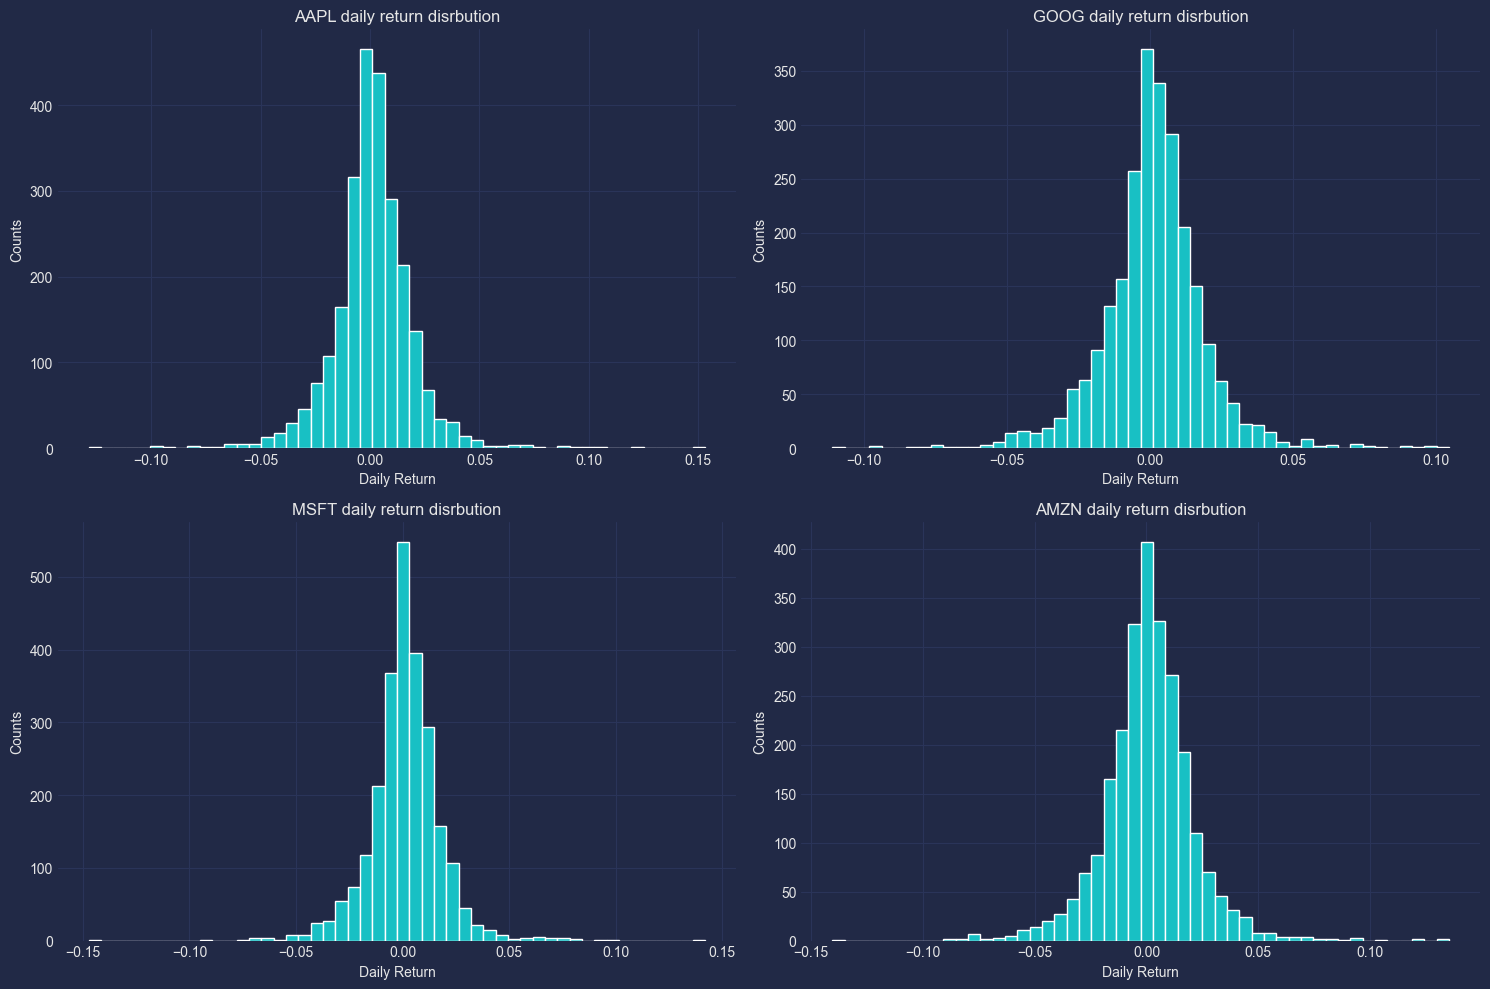

In [90]:
plt.figure(figsize=(15 , 10))

for i , ticker in enumerate(stock_list , 1):
    plt.subplot(2 , 2 , i)
    data = df[df["ticker"] == ticker]
    data["daily_return"].hist(bins=50)
    plt.title(f"{ticker} daily return disrbution")
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [91]:
close_data = yf.download(stock_list , start , end )["Close"]
rets = close_data.pct_change()
rets

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\1523296898.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close_data = yf.download(stock_list , start , end )["Close"]
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-08,NaN,NaN,NaN,NaN
2016-01-11,0.016192,0.017610,0.002183,-0.000573
2016-01-12,0.014513,0.000243,0.014022,0.009178
2016-01-13,-0.025710,-0.058392,-0.035134,-0.021599
2016-01-14,0.021871,0.019233,0.020212,0.028466
...,...,...,...,...
2025-12-31,-0.004468,-0.007354,-0.002384,-0.007918
2026-01-02,-0.003127,-0.018716,0.004844,-0.022083
2026-01-05,-0.013837,0.028962,0.006343,-0.000190


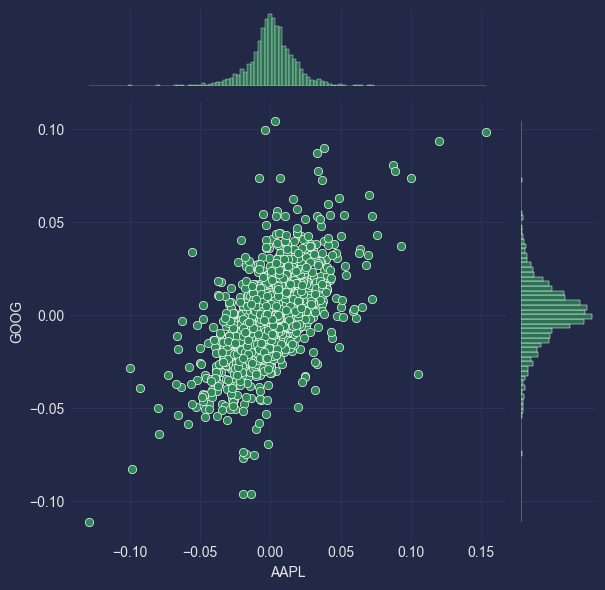

In [92]:
sns.jointplot(x="AAPL" , y= "GOOG" , data = rets , kind= "scatter"  , color="seagreen")


Text(0.5, 1.0, 'stcok return corr')

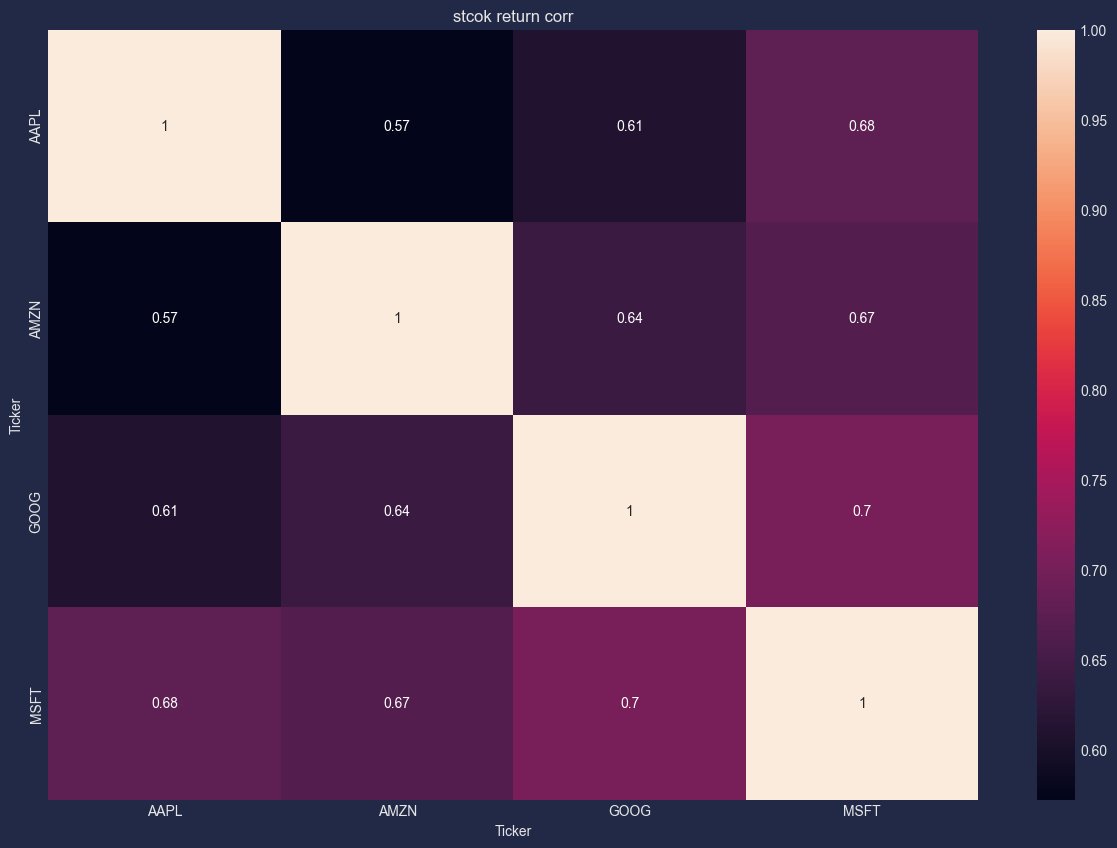

In [93]:
plt.figure(figsize=(15 , 10))

sns.heatmap(rets.corr() , annot= True )
plt.title("stcok return corr")


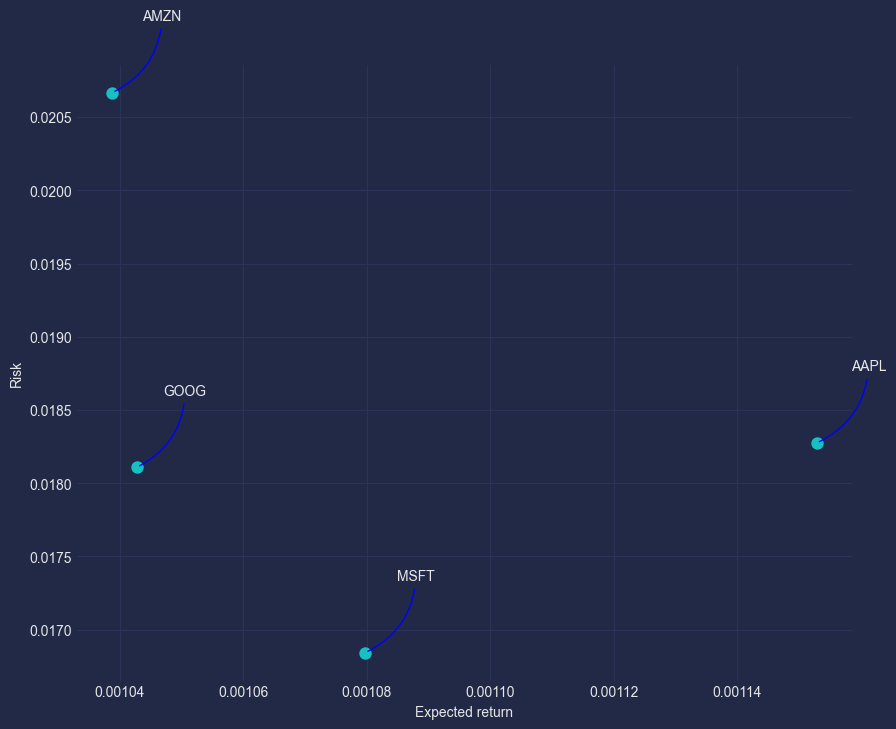

In [94]:
stock_rets = rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(stock_rets.mean(), stock_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(stock_rets.columns, stock_rets.mean(), stock_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [95]:
df = yf.download("AAPL" , start , end )
dataset = df["Close"]
dataset

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\2599578125.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL" , start , end )
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2016-01-08,21.861471
2016-01-11,22.215452
2016-01-12,22.537870
2016-01-13,21.958420
2016-01-14,22.438667
...,...
2025-12-31,271.859985
2026-01-02,271.010010
2026-01-05,267.260010


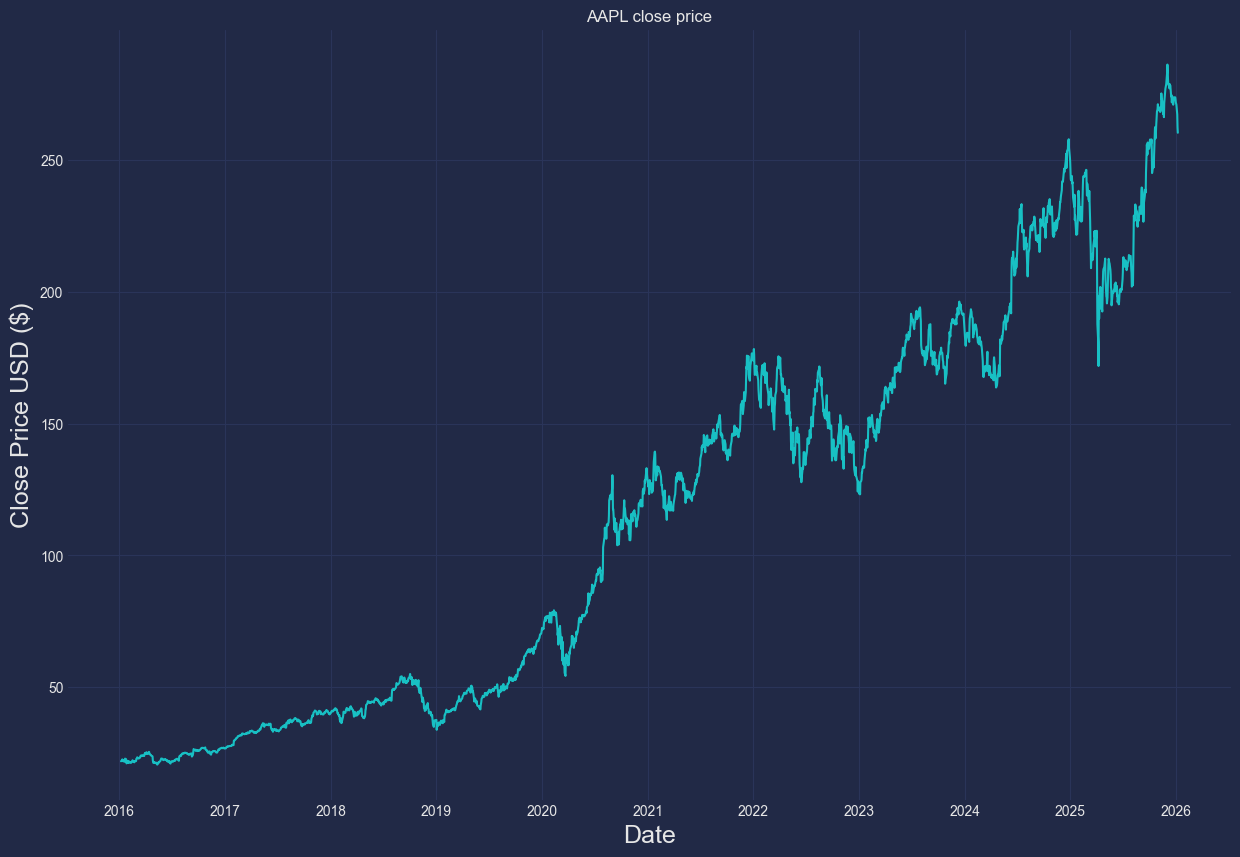

In [96]:
plt.figure(figsize=(15 , 10))

plt.title("AAPL close price")
plt.plot(dataset)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [97]:
dataset= dataset.values

In [98]:
dataset.shape

(2514, 1)

In [99]:
dataset.std()

np.float64(73.49140283664366)

In [100]:
dataset.mean()

np.float64(114.67730535281112)

In [101]:
max(dataset)

array([286.19000244])

In [102]:
min(dataset)

array([20.60407448])

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error , 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [109]:
train_data_len = int(np.ceil(len(dataset)*0.95))

scaler = MinMaxScaler(feature_range= (0 , 1))



In [110]:
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00473443],
       [0.00606726],
       [0.00728124],
       ...,
       [0.92872366],
       [0.9102738 ],
       [0.90263032]], shape=(2514, 1))

In [120]:
train_data = scaled_data[0:int(train_data_len) , :]

x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60 : i , 0])
    y_train.append(train_data[i , 0])

x_train , y_train = np.array(x_train) , np.array(y_train)

x_train.shape , y_train.shape


((2329, 60), (2329,))

In [132]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1 ))
x_train.shape

(2329, 60, 1)

In [133]:
test_data = scaled_data[train_data_len -60:, :]

x_test = []
y_test = dataset[train_data_len:, :]

for i in range(60 , len(test_data)):
    x_test.append(test_data[i -60 : i ,0])


x_test = np.array(x_test)

x_test.shape     , y_test.shape




((125, 60), (125, 1))

In [134]:
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

x_test.shape

(125, 60, 1)

In [121]:
model = Sequential()

model.add(LSTM(units= 128 , return_sequences= True , input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(units= 64 , return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer= "adam" , loss = "mean_squared_error")


c:\Users\Amir\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [123]:
model.fit(x_train , y_train , batch_size= 1 , epochs= 10)

Epoch 1/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - loss: 0.0010
Epoch 2/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 55s 24ms/step - loss: 4.4298e-04
Epoch 3/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 55s 24ms/step - loss: 3.5078e-04
Epoch 4/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - loss: 2.7740e-04
Epoch 5/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - loss: 2.8271e-04
Epoch 6/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - loss: 2.3614e-04
Epoch 7/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - loss: 2.7651e-04
Epoch 8/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - loss: 2.1518e-04
Epoch 9/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - loss: 2.1039e-04
Epoch 10/10
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - loss: 1.7265e-04


In [136]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

rmse = np.sqrt(np.mean(((pred - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


np.float64(6.030270494180648)

In [141]:
train = data[:train_data_len]
valid = data[train_data_len:]

valid["pred"] = pred

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\695911056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["pred"] = pred


In [142]:
valid

stock info,date,ticker,Open,High,Low,Close,Volume,compony_name,daily_return,pred
9557,2025-07-11,AMZN,223.580002,226.679993,222.369995,225.020004,50518300,AMZN,0.012418,209.473999
9561,2025-07-14,AMZN,225.070007,226.660004,224.240005,225.690002,35702600,AMZN,0.002978,208.194962
9565,2025-07-15,AMZN,226.199997,227.270004,225.460007,226.350006,34907300,AMZN,0.002924,205.661697
9569,2025-07-16,AMZN,225.880005,226.100006,222.179993,223.190002,39535900,AMZN,-0.013961,206.273544
9573,2025-07-17,AMZN,223.320007,224.500000,222.509995,223.880005,31855800,AMZN,0.003092,207.479324
...,...,...,...,...,...,...,...,...,...,...
10037,2025-12-31,AMZN,232.910004,232.990005,230.119995,230.820007,24383700,AMZN,-0.007354,266.917023
10041,2026-01-02,AMZN,231.339996,235.460007,224.699997,226.500000,51456200,AMZN,-0.018716,265.671600
10045,2026-01-05,AMZN,228.839996,234.000000,227.179993,233.059998,49733300,AMZN,0.028962,264.920502
10049,2026-01-06,AMZN,232.100006,243.179993,232.070007,240.929993,53764700,AMZN,0.033768,261.207886


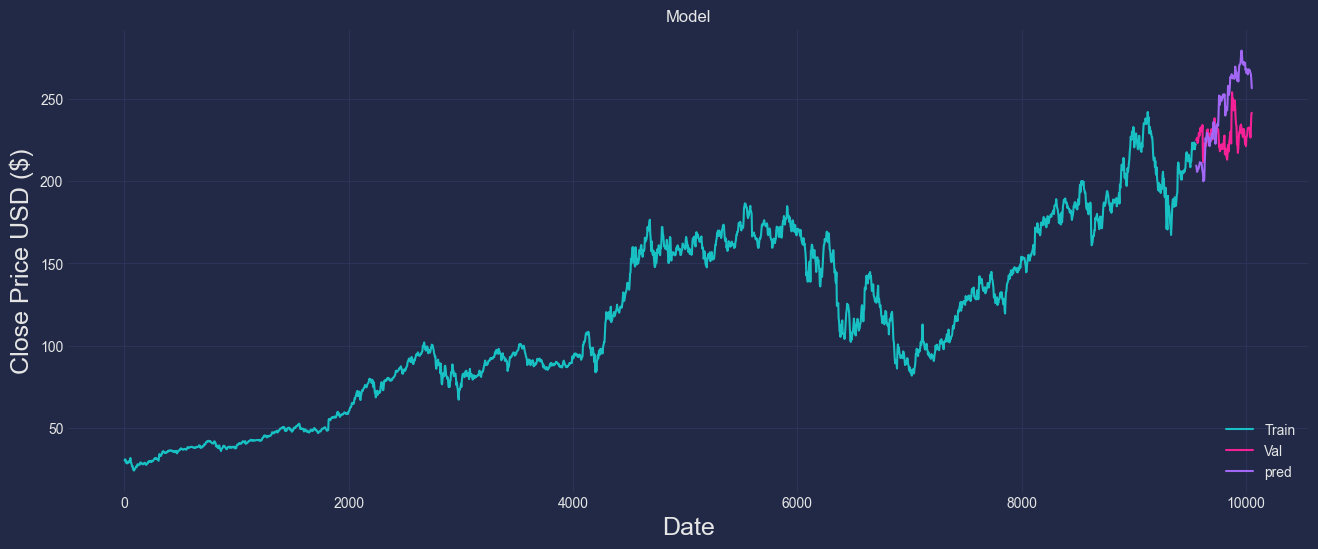

In [143]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train', 'Val', 'pred'], loc='lower right')
plt.show()